# ***Applying Machine Learning to NCAA March Madness***

***Herambeshwar Pendyala  | Srinath Botsa***

***course project-1 for cs795 - Practical Machine Learning | Yaohang Li***

![March Madness](https://adeshpande3.github.io/assets/Cover8th.png)

March Madness refers to the annual collegiate men's basketball tournament. The tournament is made up of 64 college teams competing in a single elimination format. In order to win the championship, a team has to win 6 consecutive games.


The tournament is broken up into 4 regions. Each region has 16 teams, ranked from 1 to 16. This ranking is determined by a NCAA committee and is based on each team’s regular season performance. The NCAA structures the games so that the highest seed in a region plays the lowest seed, the 2nd highest plays the 2nd lowest, and so on.

Those are the odds that you will correctly pick the winners of all 63 games played over the course of the tournament. Mathematically speaking, there are 2<sup>63</sup> (~ 9.2 quintillion) number of ways that you can fill the bracket. In 2014, Warren Buffet famously offered 1 billion dollars to anyone who could fill out a perfect bracket (Needless to say, nobody even really came close). 

Source:kaggle

### Problem Definition
- Classification Problem

### Methods
- Reading and getting to know about Data.
- Exploratory Data Analysis to get Insights from Data.
- Feature Engineering for selecting features.
- Elo Score as a feature.
- What are the Assumptions made and validating them using the Data Modelling.
- Using Logistic Regression, Random Forest to train a model from the data
- Analyzing the Model Results
- Check the accuracy using cross validation for logistic regression

### Results
- submitting the results on kaggle and comparing with leaderboard position
- various results based on various methods

### Conclusions
- Due to randomness in the data, more mining is needed to predict the right winners accurately.

### Problem Definition

As we have over 100,000 NCAA regular season games were played over the last 25+ years, and we generally have plenty of statistics about the teams for each season. Because we have all of this data, we can try to use machine learning to find out what particular statistics most correlate with a team winning a particular matchup. 


Our ML model will take in information about two teams (Team 1 and Team 2) as input, and then output a probability of Team 1 winning that matchup.

![Basic Model](https://adeshpande3.github.io/assets/MM6.png)

Now, the immediate problem that comes to mind is that ML algorithms normally have inputs in the form of singular matrices or vectors. We need to think of a way of encapsulating information about both teams in a single vector. Let’s first see if we can represent each team as a vector first.

So for predicting 2017 tournament, we take all the Season and Tournament Data till 2016 and season data of 2017  
So for predicting 2019 tournament, we take all the Season and Tournament Data till 2018 and season data of 2019  

We have used below methods:
- Logistic Regression
- Random Forest

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random 

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import math
import pickle

from demoUtils import get_seed, getSeedDataSet

import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
datadir = './data-2020-mens'
stage1Dir = '/MDataFiles_Stage1'
working_dir = datadir+stage1Dir
ProcessedDataDir = 'processedData/'

#--- STAGE -1
seasons_path = working_dir+'/MSeasons.csv'
teams_path = working_dir+'/MTeams.csv'
reg_season_compact_results_path = working_dir+'/MRegularSeasonCompactResults.csv'
reg_season_detailed_results_path = working_dir+'/MRegularSeasonDetailedResults.csv'
tourney_compact_results_path = working_dir+'/MNCAATourneyCompactResults.csv'
tourney_detailed_results_path = working_dir+'/MNCAATourneyDetailedResults.csv'
tourney_seeds_path = working_dir+'/MNCAATourneySeeds.csv'
tourney_slots_path = working_dir+'/MNCAATourneySlots.csv'

citiesPath = working_dir+'/Cities.csv'
conferencesPath = working_dir+'/Conferences.csv'
conferenceTourneyGamesPath = working_dir+'/MConferenceTourneyGames.csv'
gameCitiesPath = working_dir+'/MGameCities.csv'
#masseyOrdinalsPath = working_dir+'/MMasseyOrdinals.csv'
tourneyseedRoundSlotsPath = working_dir+'/MNCAATourneySeedRoundSlots.csv'
secondaryTourneyCompactResults = working_dir+'/MSecondaryTourneyCompactResults.csv'
secondaryTourneyTeams = working_dir+'/MSecondaryTourneyTeams.csv'
teamCoachesPath = working_dir+'/MTeamCoaches.csv'
teamConferencesPath = working_dir+'/MTeamConferences.csv'
teamSpellingsPath = working_dir+'/MTeamSpellings.csv'

#events2015Path = datadir+'/MEvents2015.csv'
#events2016Path = datadir+'/MEvents2016.csv'
#events2017Path = datadir+'/MEvents2017.csv'
#events2018Path = datadir+'/MEvents2018.csv'
#events2019Path = datadir+'/MEvents2019.csv'
playersPath = datadir+'/Mplayers.csv'

In [3]:
%%time
seasons_df = pd.read_csv(seasons_path)
teams_df = pd.read_csv(teams_path)
RSCR_df = pd.read_csv(reg_season_compact_results_path)
RSDR_df = pd.read_csv(reg_season_detailed_results_path)
tcr_df = pd.read_csv(tourney_compact_results_path)
tdr_df = pd.read_csv(tourney_detailed_results_path)
tseeds_df = pd.read_csv(tourney_seeds_path)
tslots_df = pd.read_csv(tourney_slots_path)

#--- 2020 details
citiesDF = pd.read_csv(citiesPath)
conferencesDF = pd.read_csv(conferencesPath)
confTourneyGamesDF = pd.read_csv(conferenceTourneyGamesPath)
gameCitiesDF = pd.read_csv(gameCitiesPath)
#MOrdDF = pd.read_csv(masseyOrdinalsPath)
tourSeedRoundsDF = pd.read_csv(tourneyseedRoundSlotsPath)

#--- events
# e2015 = pd.read_csv(events2015Path)
# e2016 = pd.read_csv(events2016Path)
# e2017 = pd.read_csv(events2017Path)
# e2018 = pd.read_csv(events2018Path)
# e2019 = pd.read_csv(events2019Path)

#--- Secondary tourney
teams2DF = pd.read_csv(secondaryTourneyTeams)
TCR2DF = pd.read_csv(secondaryTourneyCompactResults)

#---Team Related
playersDF = pd.read_csv(playersPath) #--- total players : 13338
coachesDF = pd.read_csv(teamCoachesPath)#--- total : 11348
teamConfDF = pd.read_csv(teamConferencesPath)#--- confDetails

teamSpellings = pd.read_csv(teamSpellingsPath, encoding='cp437')#--- 1143

Wall time: 1.65 s


In [4]:
print('number of rows in Season Data            : ',len(RSCR_df))
print('number of rows in Season Detail Data     : ',len(RSDR_df))
print('number of rows in Tournament Data        : ',len(tcr_df))
print('number of rows in Tournament Detail Data : ',len(tdr_df))
print('Season Compact Data available,     min : ',min(RSCR_df['Season']),' | max : ', max(RSCR_df['Season']))
print('Tournament Compact Data available, min : ',min(tcr_df['Season']),' | max : ', max(tcr_df['Season']))
print('Season Detail Data available,      min : ',min(RSDR_df['Season']),' | max : ', max(RSDR_df['Season']))
print('Tournament Detail Data available,  min : ',min(tdr_df['Season']),' | max : ', max(tdr_df['Season']))

number of rows in Season Data            :  161552
number of rows in Season Detail Data     :  87504
number of rows in Tournament Data        :  2251
number of rows in Tournament Detail Data :  1115
Season Compact Data available,     min :  1985  | max :  2019
Tournament Compact Data available, min :  1985  | max :  2019
Season Detail Data available,      min :  2003  | max :  2019
Tournament Detail Data available,  min :  2003  | max :  2019


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.co

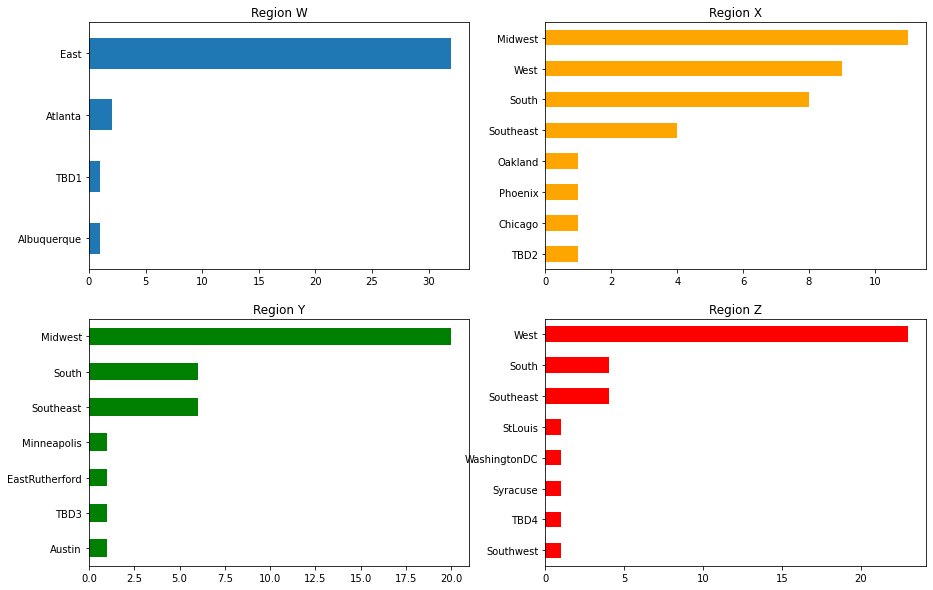

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
seasons_df['RegionW'].value_counts().sort_values().plot(kind='barh', title='Region W', ax=axs[0,0])
seasons_df['RegionX'].value_counts().sort_values().plot(kind='barh', title='Region X', ax=axs[0,1],color='Orange')
seasons_df['RegionY'].value_counts().sort_values().plot(kind='barh', title='Region Y', ax=axs[1,0],color='Green')
seasons_df['RegionZ'].value_counts().sort_values().plot(kind='barh', title='Region Z', ax=axs[1,1],color='Red')
plt.show()

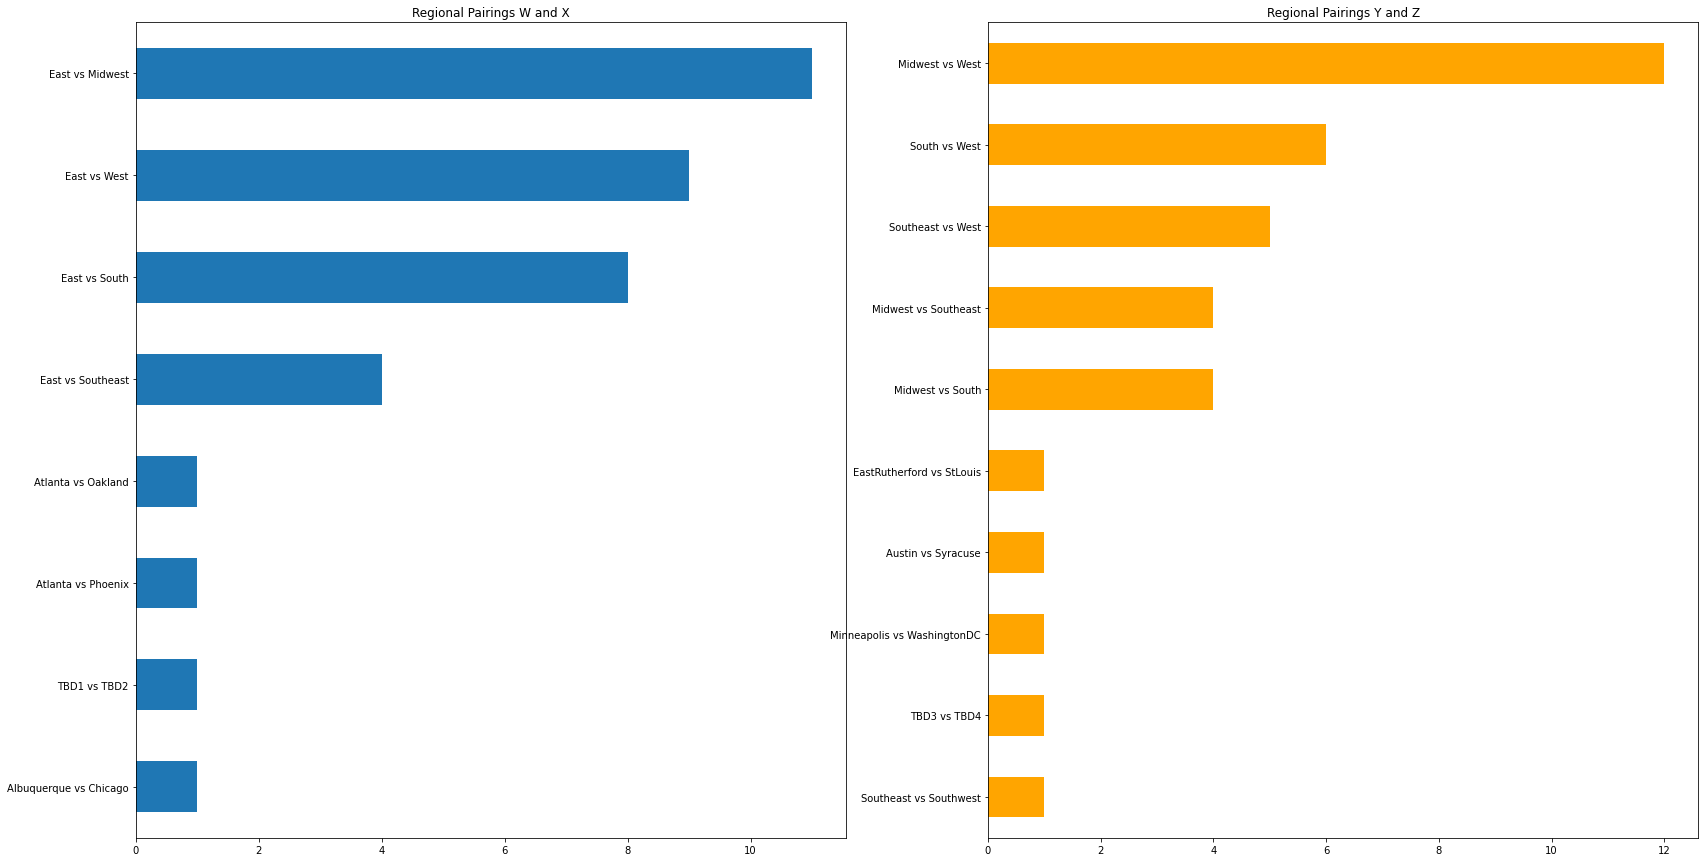

In [6]:
#--- most frequent regional Pairings
fig, axs = plt.subplots(1, 2, figsize=(28,15))
pairingsDF = seasons_df.copy()
pairingsDF['W vs X'] = seasons_df['RegionW'] + ' vs ' + seasons_df['RegionX']
pairingsDF['Y vs Z'] = seasons_df['RegionY'] + ' vs ' + seasons_df['RegionZ']
pairingsDF = pairingsDF[['Season','W vs X','Y vs Z']]
pairingsDF['W vs X'].value_counts().sort_values().plot(kind='barh',title='Regional Pairings W and X',ax=axs[0])
pairingsDF['Y vs Z'].value_counts().sort_values().plot(kind='barh',title='Regional Pairings Y and Z',ax=axs[1], color='orange')
plt.show()

#### Analyzing Seasonal Data

Final day of season :  132


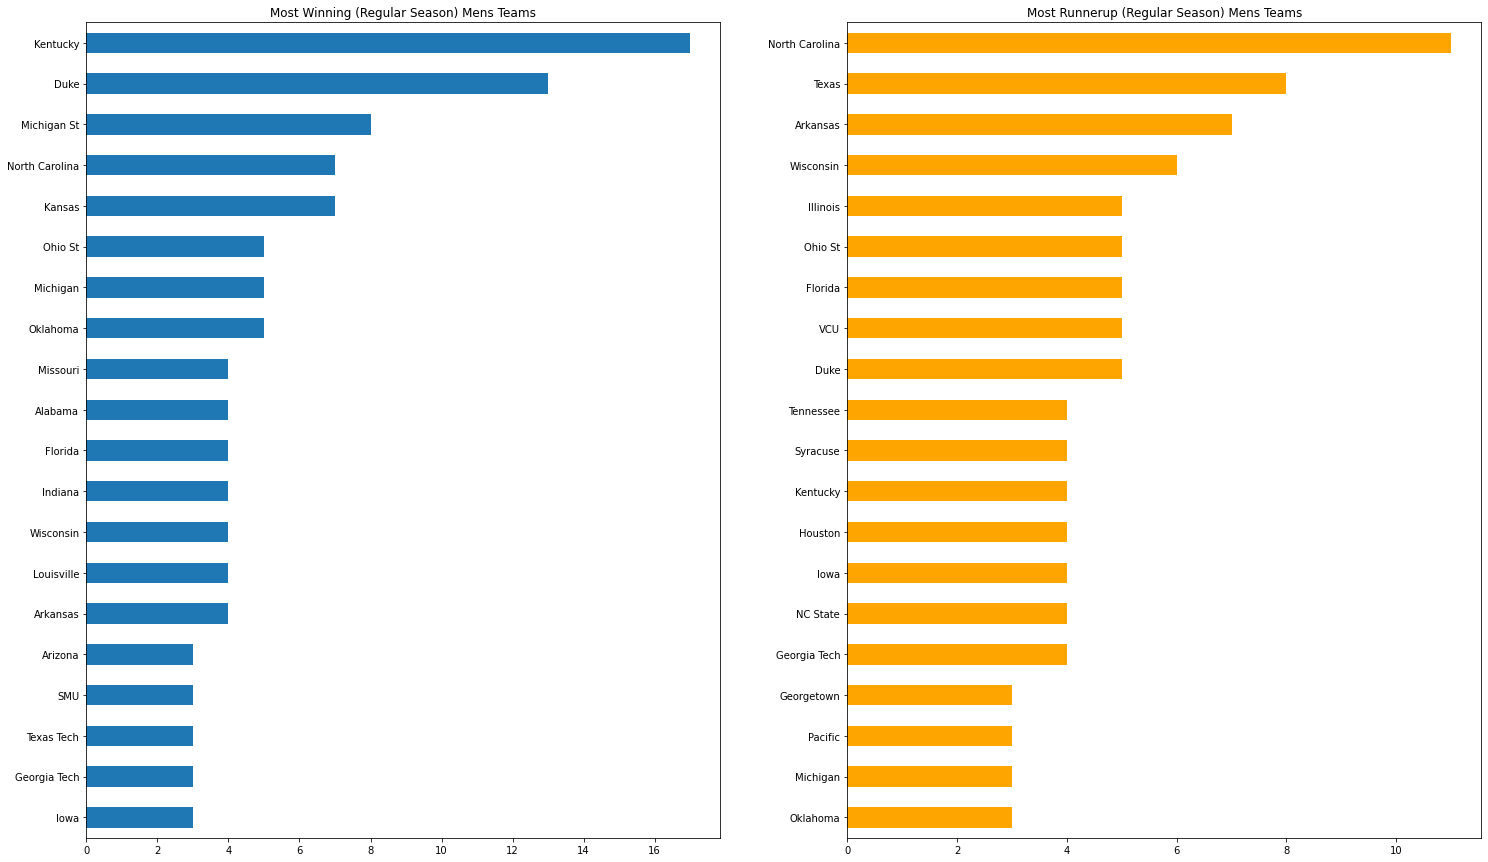

In [7]:
RSCR_df = RSCR_df.merge(teams_df[['TeamName','TeamID']],
                       left_on = 'WTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'WTeamName'}).merge(teams_df[['TeamName','TeamID']],
                       left_on = 'LTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'LTeamName'})
#RSCR_df.head()
fig, axs = plt.subplots(1, 2, figsize=(25,15))
max_day = max(RSCR_df['DayNum'])
print('Final day of season : ',max_day)
season_finale_df = RSCR_df[RSCR_df['DayNum'] ==  max_day]
season_finale_df['WTeamName'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Winning (Regular Season) Mens Teams',ax=axs[0])
season_finale_df['LTeamName'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Runnerup (Regular Season) Mens Teams',ax=axs[1],color='orange')
plt.show()

--> NumOT - this indicates the number of overtime periods in the game, an integer 0 or higher.


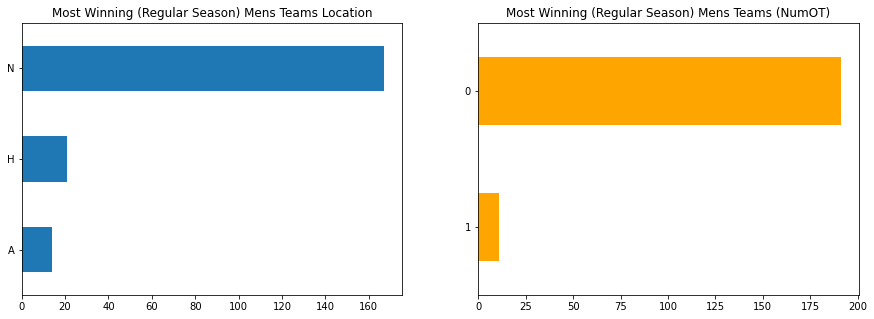

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
print('--> NumOT - this indicates the number of overtime periods in the game, an integer 0 or higher.')
season_finale_df['WLoc'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Winning (Regular Season) Mens Teams Location',ax=axs[0])
season_finale_df['NumOT'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Winning (Regular Season) Mens Teams (NumOT)',ax=axs[1],color='Orange')
plt.show()

#### Analyzing Tournament data

Final day of Tournament :  154


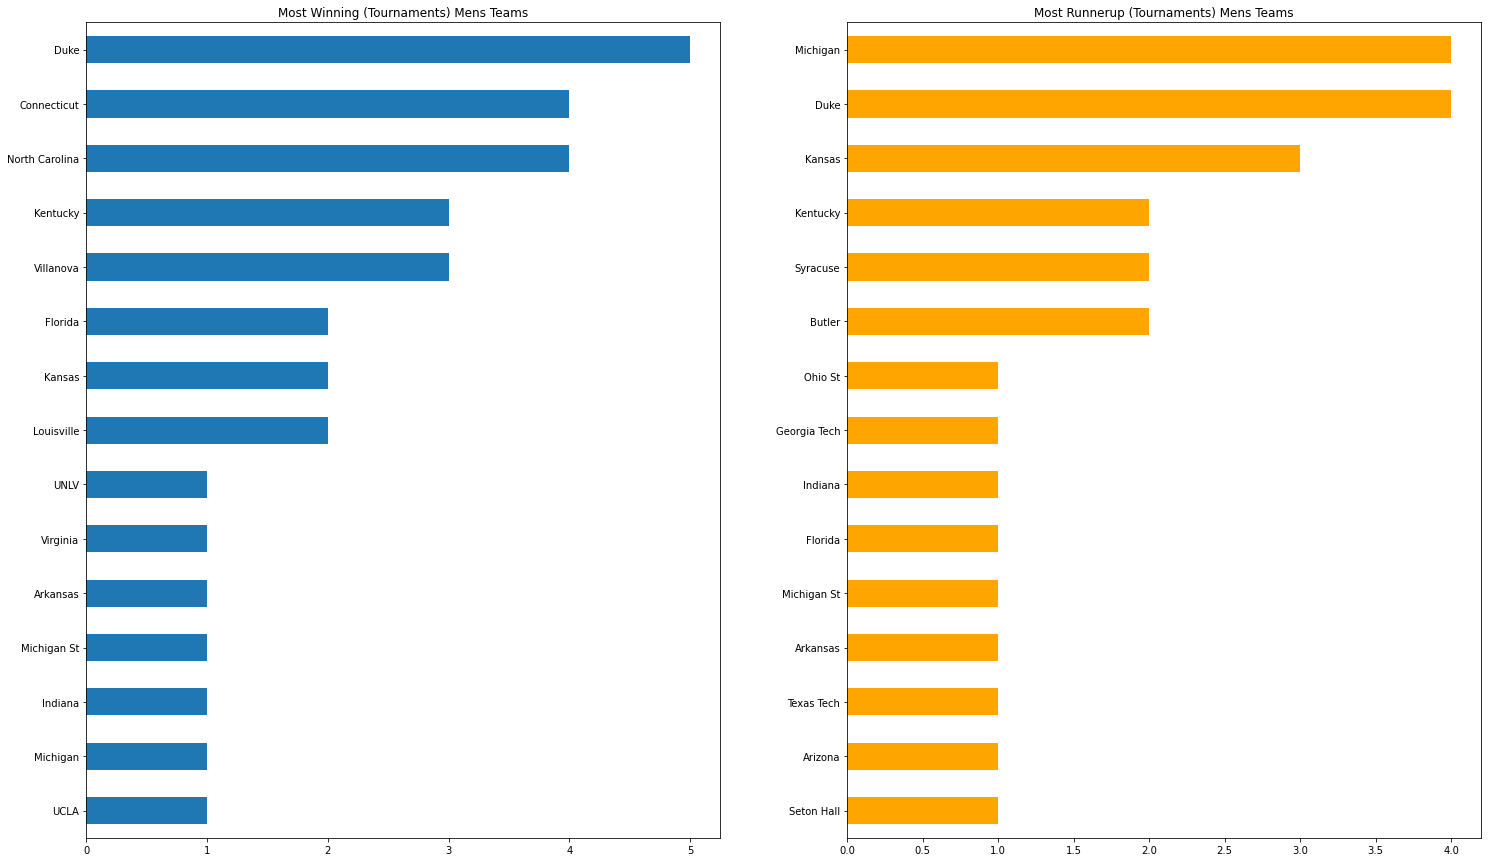

In [9]:
tcr_df = tcr_df.merge(teams_df[['TeamName','TeamID']],
                       left_on = 'WTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'WTeamName'}).merge(teams_df[['TeamName','TeamID']],
                       left_on = 'LTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'LTeamName'})
#tcr_df.head()
fig, axs = plt.subplots(1, 2, figsize=(25,15))
max_day = max(tcr_df['DayNum'])
print('Final day of Tournament : ',max_day)
t_finale_df = tcr_df[tcr_df['DayNum'] ==  max_day]
t_finale_df['WTeamName'].value_counts().sort_values().tail(15).plot(kind='barh',title='Most Winning (Tournaments) Mens Teams',ax=axs[0])
t_finale_df['LTeamName'].value_counts().sort_values().tail(15).plot(kind='barh',title='Most Runnerup (Tournaments) Mens Teams',ax=axs[1],color='orange')
plt.show()

Based on the above Analysis, we thought num of season wins, num of Season Loss, Num of tourney Appearances, Num of Tourney wins, num of Tourney Loss could be used as features..

C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


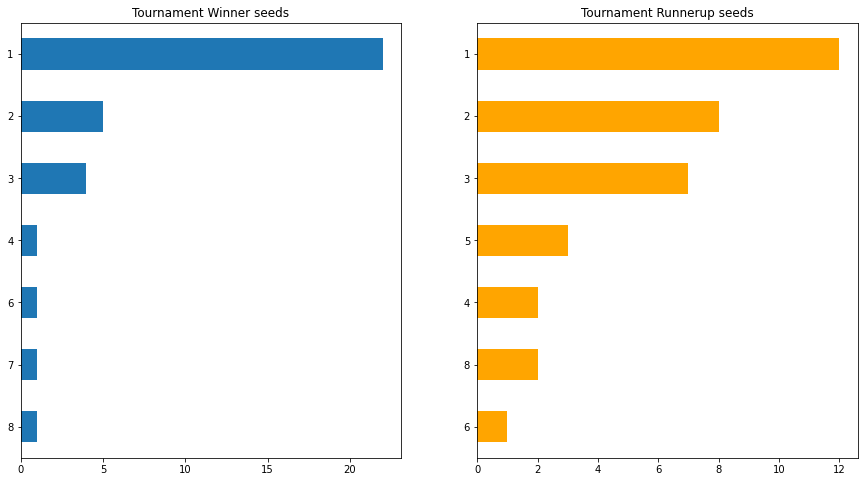

In [10]:
def getSeed(season, teamId):
    return tseeds_df[(tseeds_df['Season'] == season) & (tseeds_df['TeamID'] == teamId)]['Seed'].str[1:3].apply(pd.to_numeric).values[0]

t_finale_df['Wseed'] = np.vectorize(getSeed)(t_finale_df['Season'], t_finale_df['WTeamID'])
t_finale_df['Lseed'] = np.vectorize(getSeed)(t_finale_df['Season'], t_finale_df['LTeamID'])
t_finale_df.head()

#--- title winner seeds
fig, axs = plt.subplots(1, 2, figsize=(15,8))
t_finale_df['Wseed'].value_counts().sort_values().plot(kind='barh',title='Tournament Winner seeds',ax=axs[0])
t_finale_df['Lseed'].value_counts().sort_values().plot(kind='barh',title='Tournament Runnerup seeds',ax=axs[1],color='orange')
plt.show()

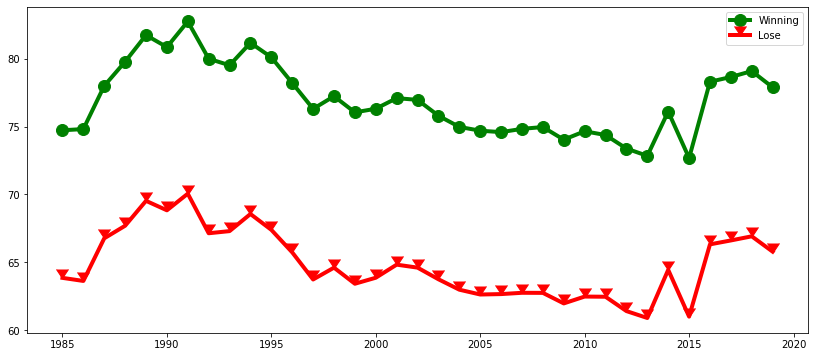

In [11]:
# Winning and Losing score Average over the years
x = RSCR_df.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(x.index,x['WScore'],marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4, label = 'Winning')
plt.plot(x.index,x['LScore'],marker=7, markerfacecolor='red', markersize=12, color='red', linewidth=4, label = 'Lose')
plt.legend()
plt.show()

***Till now we have this many features.***
- Seed Difference 
- num of season Wins
- num of season Loss
- num of Tournament Appearances
- num of Yournament Wins
- num of Tournament Loss

***Averages of below features for season***
- Score 
- fgm - field goals made
- fga - field goals attempted
- fgm3 - three pointers made
- fga3 - three pointers attempted
- ftm - free throws made
- fta - free throws attempted
- or - offensive rebounds
- dr - defensive rebounds
- ast - assists
- to - turnovers
- stl - steals
- blk - blocks
- pf - personal fouls

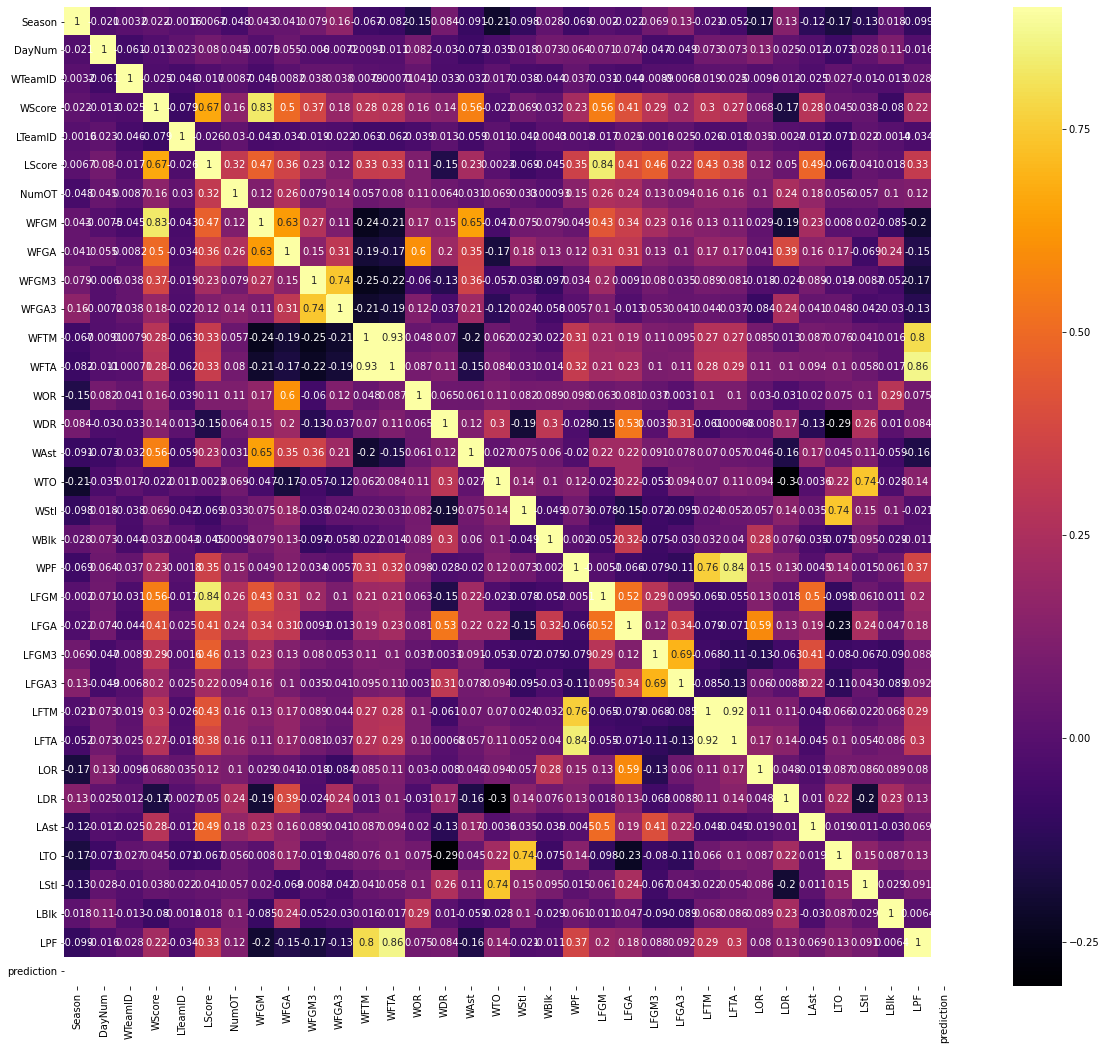

Wall time: 3.77 s


In [12]:
%%time
tdr_df_all = tdr_df.copy()
tdr_df_all['prediction'] = 1
initial_heatmap = tdr_df_all.corr()
plt.subplots(figsize=(20,18))
sns.heatmap(initial_heatmap, vmax=0.9, annot=True, cmap='inferno' ,square=False)
plt.show()

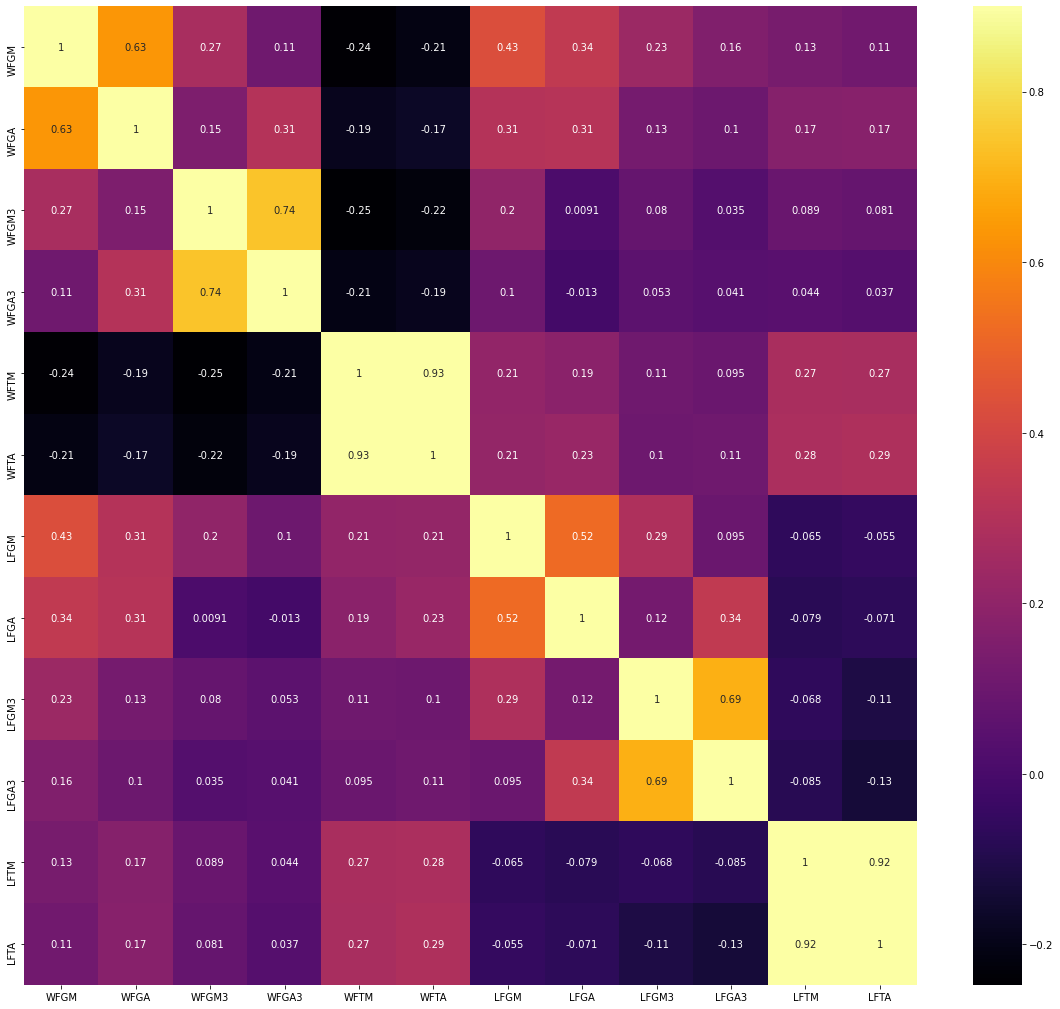

In [13]:
boxScores = tdr_df_all[['WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA']].corr()
plt.subplots(figsize=(20,18))
sns.heatmap(boxScores, vmax=0.9, annot=True, cmap='inferno' ,square=False)
plt.show()

As we can see the Field goals made/attempted, 3 pointers made made/attempted , we calculate field goal percentage, 3 pointer percentage, free throw percentage. 

This brings the features to as below.
- Seed Difference 
- num of season Wins
- num of season Loss
- num of Tournament Appearances
- num of Yournament Wins
- num of Tournament Loss
- fgp - field goal Percentage
- 3pp - 3 pointer percentage
- ftp - free throw percentage

***Averages of below features for season***
- Score 
- fgm - field goals made
- fga - field goals attempted
- fgm3 - three pointers made
- fga3 - three pointers attempted
- ftm - free throws made
- fta - free throws attempted
- or - offensive rebounds
- dr - defensive rebounds
- ast - assists
- to - turnovers
- stl - steals
- blk - blocks
- pf - personal fouls


#### Team Coach

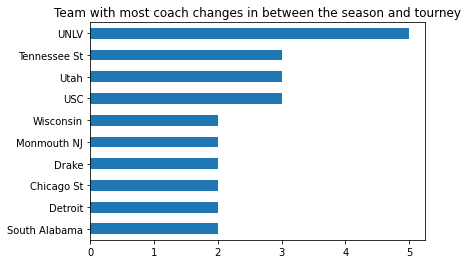

In [14]:
#--- players
playersDF[playersDF['TeamID'] == 1438]

#--- coaches
#coachesDF.head() #-- Season	TeamID	FirstDayNum	LastDayNum	CoachName
coachesDF = coachesDF.merge(teams_df[['TeamName','TeamID']], on = 'TeamID')
coachesDF[coachesDF['FirstDayNum'] != 0]
coachesDF[coachesDF['FirstDayNum'] != 0].TeamName.value_counts().sort_values().tail(10).plot(kind='barh',
                                                                                             title='Team with most coach changes in between the season and tourney')
plt.show()
#--- 1424 --- team with most coach changes
#--- lets see if the team which changes their coach has won any match in the seasons or tourneys
#--- lets chck for 2019 for team 1417
#RSCR_df[RSCR_df['Season'] == 2019 & ((RSCR_df['WTeamID'] == 1417)|(RSCR_df['LTeamID'] == 1417))]


So far from the above exploratory Data analysis we can use below features and see if we can predict the winner of the NCAA tournaments of 2017,2019

- Seed Difference (Tournament Seeds for every season)
- Box Scores (Field goals, 3 pointers, Match Score, Rebounds, Free throws, Steals, Blocks, turnovers, assists)

### Building models 

As we have classified this problem as a classification problem, we will be using logistic Regression and random forest to classify the winner and predict the winning probability.

We start with simple feature, Seed Difference and see how accurately we can predict the winner.


In [15]:
trainData = getSeedDataSet(tcr_df, tseeds_df)
trainData.head()

Total samples :  2251
Total Dataset created of samples :  4502


,DayNum,ScoreT1,ScoreT2,WLoc,NumOT,T1Seed,T2Seed,SeedDiff,result
0,136,63,54,N,0,9,8,1,1
1,138,75,69,N,0,1,8,-7,1
2,138,92,79,N,0,2,7,-5,1
3,146,84,81,N,0,1,2,-1,1
4,138,85,70,N,0,2,7,-5,1


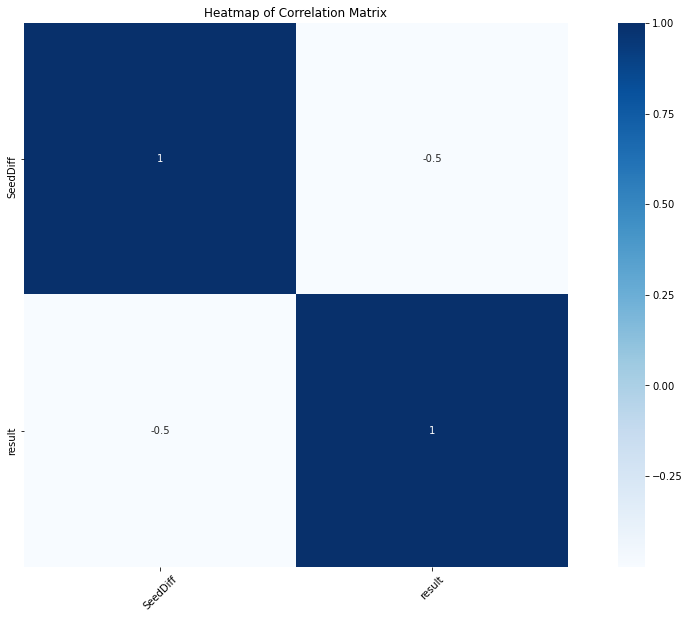

In [16]:
#--- validating the corelation
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
fig = plt.figure(figsize=(18, 10))
corr = trainData[['SeedDiff','result']].corr()
sns.heatmap(corr, cmap='Blues',annot=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

As we have seen that the seed difference and result are not so corelated (-0.5), we will be using the box score features along with other features like previous Season wins, loss, previous Tourney appearances, wins and loss to predict the winner.

### Using BoxScores, Previous Results as features.


In [17]:
#--- adding eloscore to the team
base_elo = 1600
team_elos = {}  # Reset each year.
team_stats = {}
X = []
y = []
submission_data = []

# <!!!----- Helper Functions -----!!!>
def initialize_data(Season):
    for i in range(1995, Season):
        teamStats[i] = {}
        team_elos[i] = {}
        
def readPrevData():
    teamStats = pickle.load( open( "./Stage1/teamStats2018.pkl", "rb" ) )
    team_elos = pickle.load( open( "./Stage1/teamElos2018.pkl", "rb" ) )

def update_stats(season, team, fields):
    """
    This accepts some stats for a team and udpates the averages.
    First, we check if the team is in the dict yet. If it's not, we add it.
    Then, we try to check if the key has more than 5 values in it.
        If it does, we remove the first one
        Either way, we append the new one.
    If we can't check, then it doesn't exist, so we just add this.
    Later, we'll get the average of these items.
    """
    if team not in teamStats[season]:
        teamStats[season][team] = {}

    for key, value in fields.items():
        # Make sure we have the field.
        if key not in teamStats[season][team]:
            teamStats[season][team][key] = []

        if len(teamStats[season][team][key]) >= 9:
            teamStats[season][team][key].pop()
        teamStats[season][team][key].append(value)
    return 1


# returns average of the given field
def get_stat(season, team, field):
    try:
        l = teamStats[season][team][field]
        #print('in get stat -- try ')
        return sum(l) / float(len(l))
    except:
        return 0

#--- functions to get some features
def getseasonWins(uptoSeason, teamID):
    SeasonData = RSCR_df[RSCR_df['Season'] <= uptoSeason]
    return SeasonData[SeasonData['WTeamID'] == teamID].WTeamID.count()

def getseasonLoss(uptoSeason, teamID):
    SeasonData = RSCR_df[RSCR_df['Season'] <= uptoSeason]
    return SeasonData[SeasonData['LTeamID'] == teamID].LTeamID.count()

def tourneyAppearences(uptoSeason, teamID):
    tourneyData = tcr_df[tcr_df['Season'] <= uptoSeason]
    return tourneyData[((tourneyData['LTeamID'] == teamID) | (tourneyData['WTeamID'] == teamID))].WTeamID.count()

def tourneyWins(uptoSeason, teamID):
    tourneyData = tcr_df[tcr_df['Season'] <= uptoSeason]
    return tourneyData[(tourneyData['WTeamID'] == teamID)].WTeamID.count()

def tourneyLoss(uptoSeason, teamID):
    tourneyData = tcr_df[tcr_df['Season'] <= uptoSeason]
    return tourneyData[(tourneyData['LTeamID'] == teamID)].WTeamID.count()


#--- function to calculate ELO
def calc_elo(win_team, lose_team, season):
    winner_rank = get_elo(season, win_team)
    loser_rank = get_elo(season, lose_team)

    """
    This is originally from from:
    http://zurb.com/forrst/posts/An_Elo_Rating_function_in_Python_written_for_foo-hQl
    """
    rank_diff = winner_rank - loser_rank
    exp = (rank_diff * -1) / 400
    odds = 1 / (1 + math.pow(10, exp))
    if winner_rank < 2100:
        k = 32
    elif winner_rank >= 2100 and winner_rank < 2400:
        k = 24
    else:
        k = 16
    new_winner_rank = round(winner_rank + (k * (1 - odds)))
    new_rank_diff = new_winner_rank - winner_rank
    new_loser_rank = loser_rank - new_rank_diff

    return new_winner_rank, new_loser_rank

#--- get elo from dictionary
def get_elo(season, team):
    try:
        return team_elos[season][team]
    except:
        try:
            # Get the previous season's ending value.
            team_elos[season][team] = team_elos[season-1][team]
            return team_elos[season][team]
        except:
            # Get the starter elo.
            team_elos[season][team] = base_elo
            return team_elos[season][team]

#--- function to create the dataset
# As we don't have any detailed data prior to 2003, they wil remain null 
def buildSeasonDataELO(all_data):
    print("Building season data.")
    count = 0
    for index, row in all_data.iterrows():
        # Used to skip matchups where we don't have usable stats yet.
        skip = 0
        # Get starter or previous elos.
        team_1_elo = get_elo(row['Season'], row['WTeamID'])
        team_2_elo = get_elo(row['Season'], row['LTeamID'])
        
        # Add 100 to the home team (# taken from Nate Silver analysis.)
        if row['WLoc'] == 'H':
            team_1_elo += 100
        elif row['WLoc'] == 'A':
            team_2_elo += 100
        
        # some features that are required
        prevSeasonWins1 = getseasonWins(row['Season'], row['WTeamID'])
        prevSeasonLoss1 = getseasonLoss(row['Season'], row['WTeamID'])
        tourAppearances1 = tourneyAppearences(row['Season'], row['WTeamID'])
        prevtourWins1 = tourneyWins(row['Season'], row['WTeamID'])
        prevtourLoss1 = tourneyLoss(row['Season'], row['WTeamID'])
        prevSeasonWins2 = getseasonWins(row['Season'], row['LTeamID'])
        prevSeasonLoss2 = getseasonLoss(row['Season'], row['LTeamID'])
        tourAppearances2 = tourneyAppearences(row['Season'], row['LTeamID'])
        prevtourWins2 = tourneyWins(row['Season'], row['LTeamID'])
        prevtourLoss2 = tourneyLoss(row['Season'], row['LTeamID'])
        
        # We'll create some arrays to use later for features.
        team_1_features = [row['WTeamID'], row['Season'], team_1_elo, prevSeasonWins1, prevSeasonLoss1, tourAppearances1, prevtourWins1, prevtourLoss1]
        team_2_features = [row['LTeamID'], row['Season'], team_2_elo, prevSeasonWins2, prevSeasonLoss2, tourAppearances2, prevtourWins2, prevtourLoss2]

        #team_1_features = []
        #team_2_features = []

        # Build arrays out of the stats we're tracking..
        for field in stat_fields:
            #print('--> ', field,' - ', row['Season'], ' - w :  ', row['WTeamID'], ' - L : ', row['LTeamID'])
            team_1_stat = get_stat(row['Season'], row['WTeamID'], field)
            team_2_stat = get_stat(row['Season'], row['LTeamID'], field)
            #print(team_1_stat,' - ',team_2_stat)
            if team_1_stat is not 0 and team_2_stat is not 0:
                count+=1
                team_1_features.append(team_1_stat)
                team_2_features.append(team_2_stat)
            else:
                skip = 1

        if skip == 0:  # Make sure we have stats.
            # Randomly select left and right and 0 or 1 so we can train
            # for multiple classes.
            if random.random() > 0.5:
                X.append(team_1_features + team_2_features)
                y.append(0)
            else:
                X.append(team_2_features + team_1_features)
                y.append(1)
        # AFTER we add the current stuff to the prediction, update for
        # next time. Order here is key so we don't fit on data from the
        # same game we're trying to predict.
        if row['WFTA'] != 0 and row['LFTA'] != 0:
            stat_1_fields = {
                'score': row['WScore'],
                'fgp': row['WFGM'] / row['WFGA'] * 100,
                'fga': row['WFGA'],
                'fga3': row['WFGA3'],
                '3pp': row['WFGM3'] / row['WFGA3'] * 100,
                'ftp': row['WFTM'] / row['WFTA'] * 100,
                'or': row['WOR'],
                'dr': row['WDR'],
                'ast': row['WAst'],
                'to': row['WTO'],
                'stl': row['WStl'],
                'blk': row['WBlk'],
                'pf': row['WPF']
            }
            stat_2_fields = {
                'score': row['LScore'],
                'fgp': row['LFGM'] / row['LFGA'] * 100,
                'fga': row['LFGA'],
                'fga3': row['LFGA3'],
                '3pp': row['LFGM3'] / row['LFGA3'] * 100,
                'ftp': row['LFTM'] / row['LFTA'] * 100,
                'or': row['LOR'],
                'dr': row['LDR'],
                'ast': row['LAst'],
                'to': row['LTO'],
                'stl': row['LStl'],
                'blk': row['LBlk'],
                'pf': row['LPF']
            }
            update_stats(row['Season'], row['WTeamID'], stat_1_fields)
            update_stats(row['Season'], row['LTeamID'], stat_2_fields)
        # Now that we've added them, calc the new elo.
        new_winner_rank, new_loser_rank = calc_elo(
            row['WTeamID'], row['LTeamID'], row['Season'])
        team_elos[row['Season']][row['WTeamID']] = new_winner_rank
        team_elos[row['Season']][row['LTeamID']] = new_loser_rank
    print('--> count for get loop : ',count)
    return X, y



#--- for test data get all previous data
def getPrevData(Season, TeamID):
    return [ getseasonWins(Season, TeamID), getseasonLoss(Season, TeamID), tourneyAppearences(Season, TeamID),
                 tourneyWins(Season, TeamID), tourneyLoss(Season, TeamID) ]

#--- predict winner function
def predict_winner(team_1, team_2, season, model, stat_fields, elo):
    features = []

    # Team 1
    features = getPrevData(season, team_1)
    if elo == True:
        features.append(get_elo(season, team_1))
    for stat in stat_fields:
        features.append(get_stat(season, team_1, stat))

    # Team 2
    features+=getPrevData(season, team_2)
    if elo == True:
        features.append(get_elo(season, team_2))
    for stat in stat_fields:
        features.append(get_stat(season, team_2, stat))
    return model.predict_proba([features])[0][0]

#--- train Data
def trainData(model, season, X,y):
    # Fit the model.
    print("Fitting on %d samples." % len(X))
    print("Features of %d  for all samples." % len(X[1]))
    if model == 'lr':
        print('--> Using Logistic Regression..')
        model = linear_model.LogisticRegression()
        # Check accuracy.
        print("Doing 10 fold cross-validation.")
        print('Cross Validation Score : ',cross_val_score(
                model, np.array(X), np.array(y), cv=10, scoring='accuracy', n_jobs=-1
        ).mean())
        model.fit(X, y)
    elif model == 'rf':
        print('--> Using Random Forest..')
        model = RandomForestClassifier(n_estimators=200)
        model.fit(X, y)
    else:
        print('Training : Not a valid Setting...-',model,'-.')
        return 0
    return model




filesData = {
    2017 : {'test' : '/SampleSubmission_2017.csv'},
    2019 : {'test' : '/SampleSubmissionStage2_2019.csv'}
}


def createTestSubmissions(name, model,season, elo=False):
    # https://stackoverflow.com/questions/12182744/python-pandas-apply-a-function-with-arguments-to-a-series?noredirect=1&lq=1
    #-- https://stackoverflow.com/questions/41177269/how-to-use-pd-apply-with-my-own-custom-function-that-take-1-input-argument
    print('Setting Machine Learning Model..')
#     if model == 'lr':
#         clf = linear_model.LogisticRegression()
#     elif model == 'rf':
#         clf = RandomForestClassifier(n_estimators=200)
#     else:
#         print('Predicting : Not a valid Setting...-',model,'-.',)
#         return 0
    print('Getting teams..')
    print('Predicting using ...')
    sub = pd.read_csv(datadir + filesData[season]['test'])
    sub.columns = ['ID','Pred']
    sub["Season"] = sub["ID"].apply(lambda x: x[0:4]).astype(int)
    sub["T1_TeamID"] = sub["ID"].apply(lambda x: x[5:9]).astype(int)
    sub["T2_TeamID"] = sub["ID"].apply(lambda x: x[10:14]).astype(int)
    submissionData = []

    for index, row in sub.iterrows(): 
        submissionData.append(predict_winner(row['T1_TeamID'],row['T2_TeamID'], row['Season'], model, stat_fields, elo))

    sub['mPred'] = submissionData
    submissionCSV = sub[['ID','mPred']]
    submissionCSV.columns = ['ID','Pred']
    submissionCSV.to_csv('stage1/submission-'+str(season)+'_'+name+'.csv', index = None)
    print('Prediction complete and data saved in directory.')
    return 1

def showFeatureImportance(model,my_categories):
    plt.figure(figsize=(10,10))
    fx_imp = pd.Series(abs(model.coef_[0]), index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp = fx_imp.sort_values(ascending=True)
    fx_imp.plot(kind='barh',title='Feature importance in predicting the output')
    plt.show()
    return 1

def showFeatureImportanceEnsembles(model, my_categories):
    plt.figure(figsize=(10,10))
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp = fx_imp.sort_values(ascending=True)
    fx_imp.plot(kind='barh')
    plt.show()
    return 1

In [18]:
#---- code to build the training data
#--- as the data is already set is already on place we have below code, 
# please uncomment the below lines if you want to execute the code to create a new dataset.
#--- NOTE : this takes around 1.05 hrs to run so, we have attached saved data as well that will be used in the below cells.
'''
predictingSeason = 2020
initialize_data(predictingSeason)
X=[]
y=[]
stat_fields = ['score','fga', 'fgp', 'fga3', '3pp', 'ftp', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
allData = pd.concat([RSDR_df,tdr_df])
allData = allData[allData['Season'] < predictingSeason]
print(max(allData.Season))
X, y = buildSeasonDataELO(allData)
ProcessedDataDir = 'processedData/'
print('--> Training Samples : ',len(X))
print('--> Training DependentVariable : ',len(y))
np.save(ProcessedDataDir + 'xTrainV3.npy', X)
np.save(ProcessedDataDir + 'yTrainV3.npy', y)
#import pickle
f = open("teamStats2020.pkl","wb")
pickle.dump(teamStats,f)
f.close()
print('Written teamStats to pickle file')
f = open("teamElos2020.pkl","wb")
pickle.dump(team_elos,f)
f.close()
print('Written teamElos to pickle file')
'''

'\npredictingSeason = 2020\ninitialize_data(predictingSeason)\nX=[]\ny=[]\nstat_fields = [\'score\',\'fga\', \'fgp\', \'fga3\', \'3pp\', \'ftp\', \'or\', \'dr\', \'ast\', \'to\', \'stl\', \'blk\', \'pf\']\nallData = pd.concat([RSDR_df,tdr_df])\nallData = allData[allData[\'Season\'] < predictingSeason]\nprint(max(allData.Season))\nX, y = buildSeasonDataELO(allData)\nProcessedDataDir = \'processedData/\'\nprint(\'--> Training Samples : \',len(X))\nprint(\'--> Training DependentVariable : \',len(y))\nnp.save(ProcessedDataDir + \'xTrainV3.npy\', X)\nnp.save(ProcessedDataDir + \'yTrainV3.npy\', y)\n#import pickle\nf = open("teamStats2020.pkl","wb")\npickle.dump(teamStats,f)\nf.close()\nprint(\'Written teamStats to pickle file\')\nf = open("teamElos2020.pkl","wb")\npickle.dump(team_elos,f)\nf.close()\nprint(\'Written teamElos to pickle file\')\n'

In [19]:
x2017 = np.load(ProcessedDataDir + 'xTrain2017V2.npy')
tResult2017 = np.load(ProcessedDataDir + 'yTrain2017V2.npy')
predictionYear = 2017
Features = ['WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 'WprevtourLoss',
            'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',
            'LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins', 'LprevtourLoss',
            'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']
df2017 = pd.DataFrame(data=x2017)
df2017.columns = ['WTeamID','Season','WELO','WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 'WprevtourLoss',
                    'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk',
                    'Wpf','LTeamID','LSeason','LELO','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins', 'LprevtourLoss',
                    'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk',
                    'Lpf']
df2017 = df2017.drop(['LSeason'], axis=1)
df2017 = df2017[['Season', 'WTeamID', 'LTeamID','WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 
                 'WprevtourLoss', 'WELO','Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto',
                 'Wstl', 'Wblk', 'Wpf','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins',
                 'LprevtourLoss', 'LELO', 'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto',
                 'Lstl', 'Lblk', 'Lpf']]

trainDf = df2017.copy()
trainDf['Result'] = tResult2017
trainDf = trainDf.drop(['WELO','LELO'], axis=1)
trainDf.head()

,Season,WTeamID,LTeamID,WprevSeasonWins,WprevSeasonLoss,WtourAppearances,WprevtourWins,WprevtourLoss,Wscore,Wfga,...,L3pp,Lftp,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,Result
0,2003.0,1186.0,1457.0,170.0,305.0,0.0,0.0,0.0,55.0,46.0,...,27.272727,53.333333,17.0,20.0,9.0,19.0,4.0,3.0,23.0,0
1,2003.0,1458.0,1296.0,283.0,252.0,15.0,8.0,7.0,81.0,57.0,...,33.333333,54.838710,6.0,19.0,11.0,12.0,14.0,2.0,18.0,0
2,2003.0,1135.0,1125.0,178.0,307.0,1.0,0.0,1.0,65.0,56.0,...,33.333333,50.000000,14.0,26.0,12.0,17.0,10.0,0.0,17.0,1
3,2003.0,1236.0,1156.0,9.0,20.0,0.0,0.0,0.0,62.0,41.0,...,33.333333,44.444444,13.0,26.0,13.0,25.0,8.0,2.0,18.0,1
4,2003.0,1194.0,1161.0,74.0,192.0,1.0,0.0,1.0,71.0,58.0,...,25.000000,82.051282,13.0,18.0,14.0,17.0,11.0,1.0,25.0,1


In [20]:
np.array(Features)

array(['WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances',
       'WprevtourWins', 'WprevtourLoss', 'Wscore', 'Wfga', 'Wfgp',
       'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl',
       'Wblk', 'Wpf', 'LprevSeasonWins', 'LprevSeasonLoss',
       'LtourAppearances', 'LprevtourWins', 'LprevtourLoss', 'Lscore',
       'Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last',
       'Lto', 'Lstl', 'Lblk', 'Lpf'], dtype='<U16')

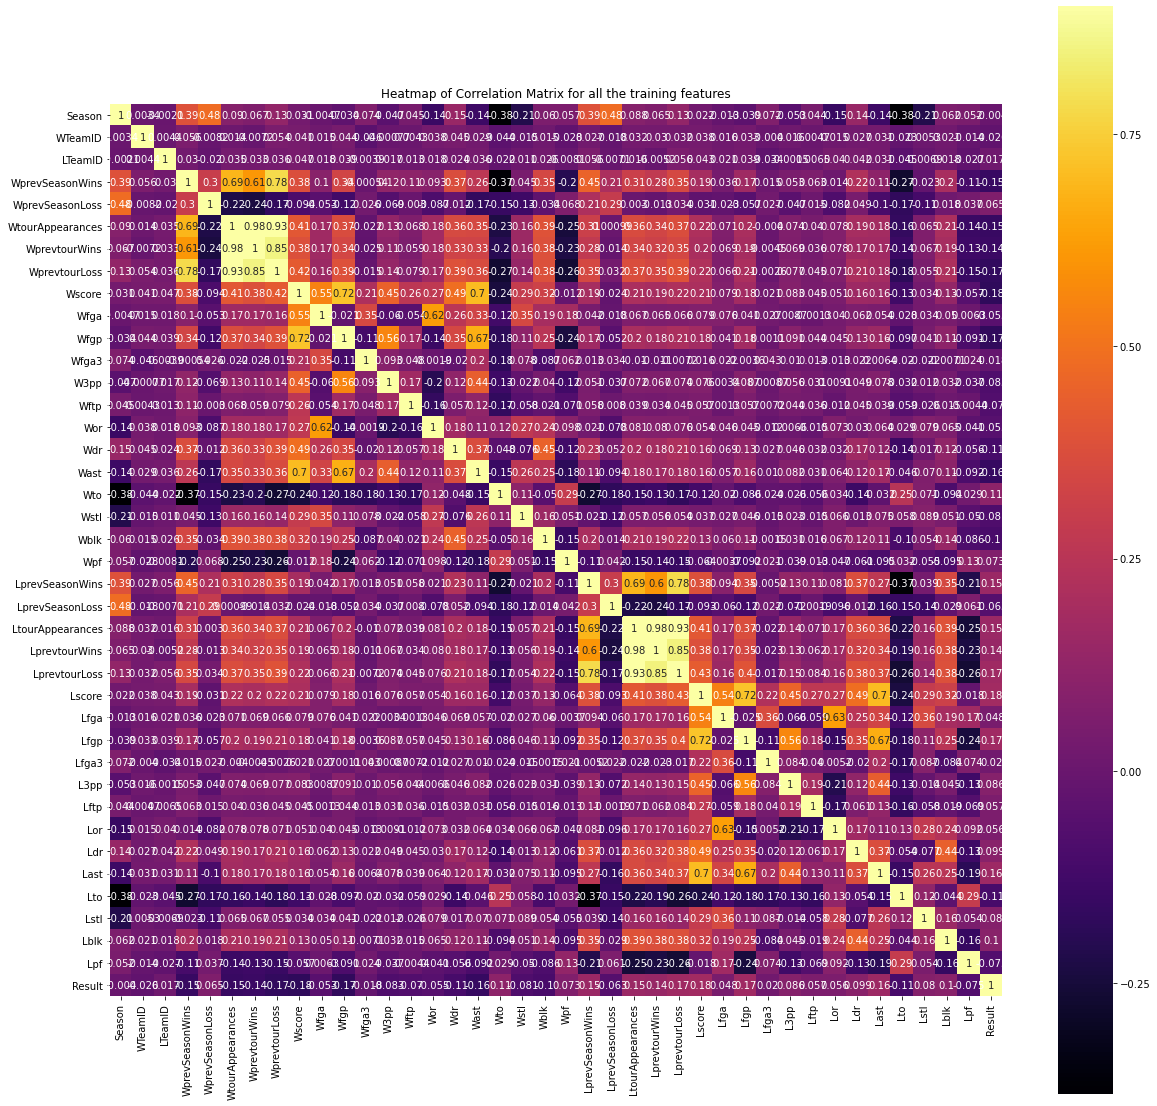

Wall time: 6.14 s


In [21]:
%%time
plt.subplots(figsize=(20,20))
sns.heatmap(trainDf.corr(), cmap='inferno', vmax=0.9, annot=True, square=True)
plt.title('Heatmap of Correlation Matrix for all the training features')
plt.show()

In [22]:
teamStats = pickle.load( open( "./Stage1/teamStats2018.pkl", "rb" ) )
team_elos = pickle.load( open( "./Stage1/teamElos2018.pkl", "rb" ) )
print(teamStats.keys())
print(team_elos.keys())

dict_keys([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
dict_keys([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])


In [23]:
from sklearn import metrics

def plotConfusionMatrix(labels, predictions, accScore):
    cm = metrics.confusion_matrix(labels, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Test Accuracy Score: {0}'.format(accScore)
    plt.title(all_sample_title, size = 15);
    return 1

##### <--- Logistic Regression--->

Working for prediction season :  2017
Fitting on 55376 samples.
Features of 36  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.6842494592828454


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training model on 80% data complete..
Applying model on Test set of :  13844  Samples
Predicting for Test set complete..
--> Accuracy: 0.6786333429644611
--> Precision: 0.682463068597338
--> Recall: 0.6719470046082949
Plotting Confusion Matrix.
Wall time: 11.9 s


1

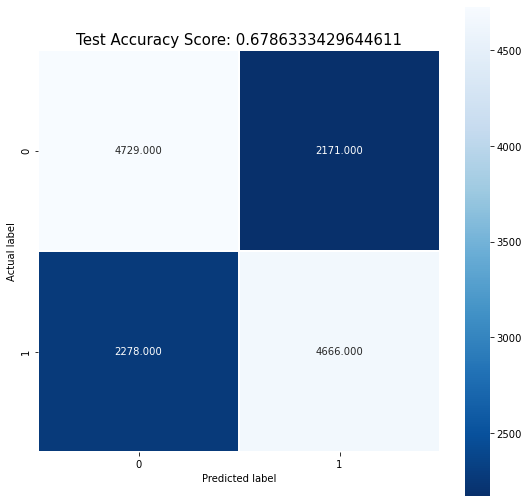

In [24]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

stat_fields = ['score','fga', 'fgp', 'fga3', '3pp', 'ftp', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
train2017 = df2017.drop(['Season','WTeamID','LTeamID','WELO','LELO'], axis=1)

xTrain,xTest,yTrain,yTest = train_test_split(train2017,tResult2017,test_size=0.20, random_state=0)
print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, xTrain.to_numpy(), yTrain)
#showFeatureImportance(model,Features)
print('Training model on 80% data complete..')
print('Applying model on Test set of : ',len(yTest),' Samples')
predictions = model.predict(xTest)
print('Predicting for Test set complete..')
acc_score = model.score(xTest, yTest)
print("--> Accuracy:",metrics.accuracy_score(yTest, predictions))
print("--> Precision:",metrics.precision_score(yTest, predictions))
print("--> Recall:",metrics.recall_score(yTest, predictions))
print('Plotting Confusion Matrix.')
plotConfusionMatrix(yTest, predictions, acc_score)

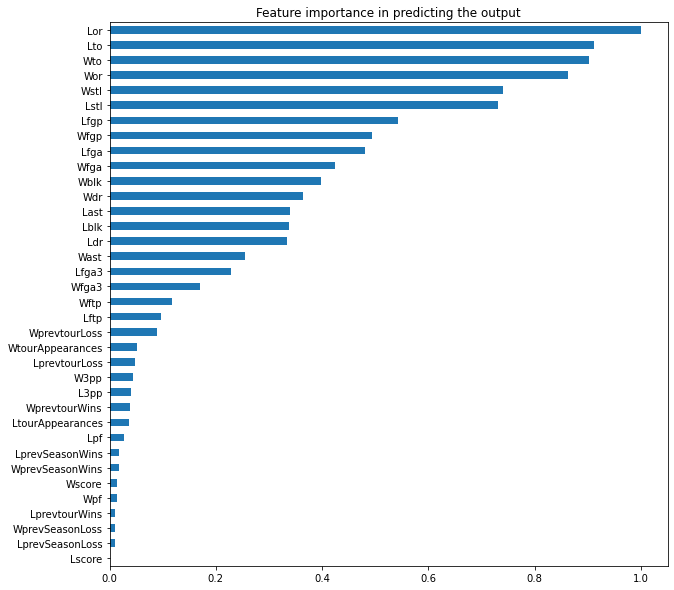

1

In [25]:
showFeatureImportance(model, Features)

In [26]:
%%time
print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, train2017.to_numpy(), tResult2017)
print('creating Submission File for all the matchups')
createTestSubmissions('lr01',model,predictionYear)

Working for prediction season :  2017
Fitting on 69220 samples.
Features of 36  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.6826928633342965


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


creating Submission File for all the matchups
Setting Machine Learning Model..
Getting teams..
Predicting using ...
Prediction complete and data saved in directory.
Wall time: 2min 29s


1

##### <--- Random Forest --->

Working for prediction season :  2017
Fitting on 55376 samples.
Features of 36  for all samples.
--> Using Random Forest..
Training model complete..
Applying model on Test set of :  13844  Samples
Predicting for Test set complete..
--> Accuracy: 0.6720600982375036
--> Precision: 0.6764533176746917
--> Recall: 0.663594470046083
Plotting Confusion Matrix.
Wall time: 43.7 s


1

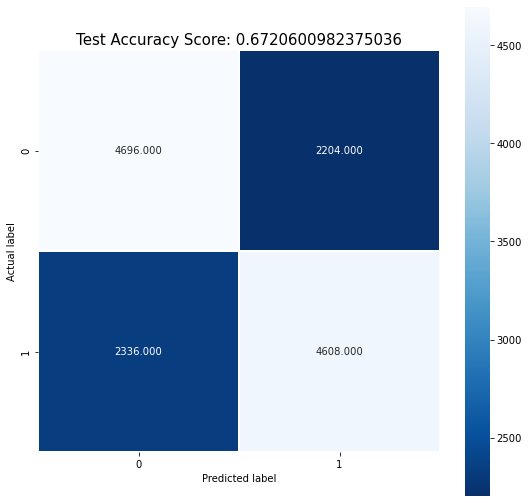

In [27]:
%%time
#--- random forest
print('Working for prediction season : ',str(predictionYear))
model = trainData('rf', predictionYear, xTrain.to_numpy(), yTrain)
#showFeatureImportance(model,Features)
print('Training model complete..')
print('Applying model on Test set of : ',len(yTest),' Samples')
predictions = model.predict(xTest)
print('Predicting for Test set complete..')
acc_score = metrics.accuracy_score(yTest, predictions)
print("--> Accuracy:",acc_score)
print("--> Precision:",metrics.precision_score(yTest, predictions))
print("--> Recall:",metrics.recall_score(yTest, predictions))
print('Plotting Confusion Matrix.')
plotConfusionMatrix(yTest, predictions, acc_score)

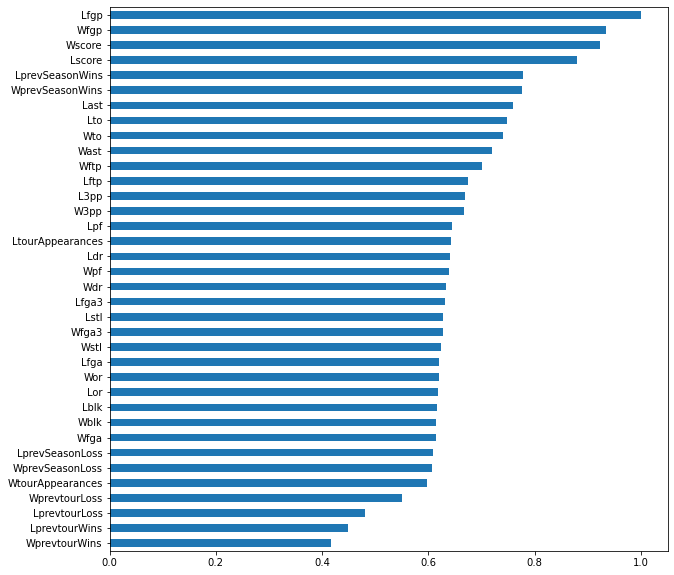

1

In [28]:
showFeatureImportanceEnsembles(model, Features)

In [29]:
%%time
print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, train2017.to_numpy(), tResult2017)
print('creating Submission File for all the matchups')
createTestSubmissions('rf01',model,predictionYear)

Working for prediction season :  2017
Fitting on 69220 samples.
Features of 36  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.6826928633342965


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


creating Submission File for all the matchups
Setting Machine Learning Model..
Getting teams..
Predicting using ...
Prediction complete and data saved in directory.
Wall time: 2min 29s


1


### ELO Score

As we have seen from the above that the box score features alone are not so good in getting a better prediction, so we have used an algorithm called as Elo Ranking Algorithm, Elo Rating Algorithm is widely used rating algorithm that is used to rank players in many competitive games.

Players with higher ELO rating have a higher probability of winning a game than a player with lower ELO rating. After each game, ELO rating of players is updated. If a player with higher ELO rating wins, only a few points are transferred from the lower rated player. However if lower rated player wins, then transferred points from a higher rated player are far greater.

Elo system consists of two parts:

When Player A competes in a match against Player B, Player A has an expected outcome (probability or score) for team A (EA). Where $R_A$ = Rating for team A and $R_B$ = Rating for team B; The expected outcome for team A (EA) can be calculated by the formula below:

$$
EA = \frac{1}{1 + 10^{(R_B - R_A) / 400}}
$$

the same calculation (EB) has to be done for Player B, but with RA (current rating A) and RB (current rating B) swapped so that EA + EB = 1. Once the match is played and SA (actual outcome or score for team A), and SB (actual outcome or score for team B) are determined, R’ A (New rating for A) and R’ B (New rating for A) are calculated with the formula below:

$$
R’ A = R_A + K (SA - EA) 
$$

Where K is an optimization constant that usually take different values according the sport and the amount of games available.

For the values of S we will stay with the classic definition of win-loss-tie and we will ignore the points made so that: Win = 1, Loss = 0, Tie = 1/2

***Example***

Suppose there is a live match on chess.com between two players, rating1 = 1200, rating2 = 1000;

P1 = (1.0 / (1.0 + pow(10, ((1000-1200) / 400)))) = 0.76

P2 = (1.0 / (1.0 + pow(10, ((1200-1000) / 400)))) = 0.24

And Assume constant K=30;

***Case-1 : Suppose Player 1 wins:***

rating1 = rating1 + k*(actual – expected) = 1200+30(1 – 0.76) = 1207.2;

rating2 = rating2 + k*(actual – expected) = 1000+30(0 – 0.24) = 992.8;

***Case-2 : Suppose Player 2 wins:***

rating1 = rating1 + k*(actual – expected) = 1200+30(0 – 0.76) = 1177.2;

rating2 = rating2 + k*(actual – expected) = 1000+30(1 – 0.24) = 1022.8;


### Using ELO Score as a feature 

Now that we have seen that we can use elo score as a feature, lets include it while training the model and predict the outcomes 


#### Predicting 2017 Winners

***Final Features***
- ELO Score 
- num of season Wins
- num of season Loss
- num of Tournament Appearances
- num of Yournament Wins
- num of Tournament Loss

***Averages of below features for season***

- FGP - Field GOals Made Percentage
- FTP - Free throw Percentage
- 3PP - 3 pointer Percentage
- Score 
- fgm - field goals made
- fga - field goals attempted
- fgm3 - three pointers made
- fga3 - three pointers attempted
- ftm - free throws made
- fta - free throws attempted
- or - offensive rebounds
- dr - defensive rebounds
- ast - assists
- to - turnovers
- stl - steals
- blk - blocks
- pf - personal fouls



In [30]:
Features = ['WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 
                 'WprevtourLoss', 'WELO', 'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto',
                 'Wstl', 'Wblk', 'Wpf','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins',
                 'LprevtourLoss', 'LELO', 'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto',
                 'Lstl', 'Lblk', 'Lpf']
x2017 = np.load(ProcessedDataDir + 'xTrain2017V2.npy')
tResult2017 = np.load(ProcessedDataDir + 'yTrain2017V2.npy')
predictionYear = 2017
team_elos[predictionYear] = {}
df2017 = pd.DataFrame(data=x2017)
df2017.columns = ['WTeamID','Season','WELO','WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 'WprevtourLoss',
                    'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk',
                    'Wpf','LTeamID','LSeason','LELO','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins', 'LprevtourLoss',
                    'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk',
                    'Lpf']
df2017 = df2017.drop(['LSeason'], axis=1)
df2017 = df2017[['Season', 'WTeamID', 'LTeamID','WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 
                 'WprevtourLoss', 'WELO', 'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto',
                 'Wstl', 'Wblk', 'Wpf','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins',
                 'LprevtourLoss', 'LELO', 'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto',
                 'Lstl', 'Lblk', 'Lpf']]

trainDf = df2017.copy()
trainDf['Result'] = tResult2017
trainDf.head()

,Season,WTeamID,LTeamID,WprevSeasonWins,WprevSeasonLoss,WtourAppearances,WprevtourWins,WprevtourLoss,WELO,Wscore,...,L3pp,Lftp,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,Result
0,2003.0,1186.0,1457.0,170.0,305.0,0.0,0.0,0.0,1584.0,55.0,...,27.272727,53.333333,17.0,20.0,9.0,19.0,4.0,3.0,23.0,0
1,2003.0,1458.0,1296.0,283.0,252.0,15.0,8.0,7.0,1716.0,81.0,...,33.333333,54.838710,6.0,19.0,11.0,12.0,14.0,2.0,18.0,0
2,2003.0,1135.0,1125.0,178.0,307.0,1.0,0.0,1.0,1584.0,65.0,...,33.333333,50.000000,14.0,26.0,12.0,17.0,10.0,0.0,17.0,1
3,2003.0,1236.0,1156.0,9.0,20.0,0.0,0.0,0.0,1584.0,62.0,...,33.333333,44.444444,13.0,26.0,13.0,25.0,8.0,2.0,18.0,1
4,2003.0,1194.0,1161.0,74.0,192.0,1.0,0.0,1.0,1616.0,71.0,...,25.000000,82.051282,13.0,18.0,14.0,17.0,11.0,1.0,25.0,1


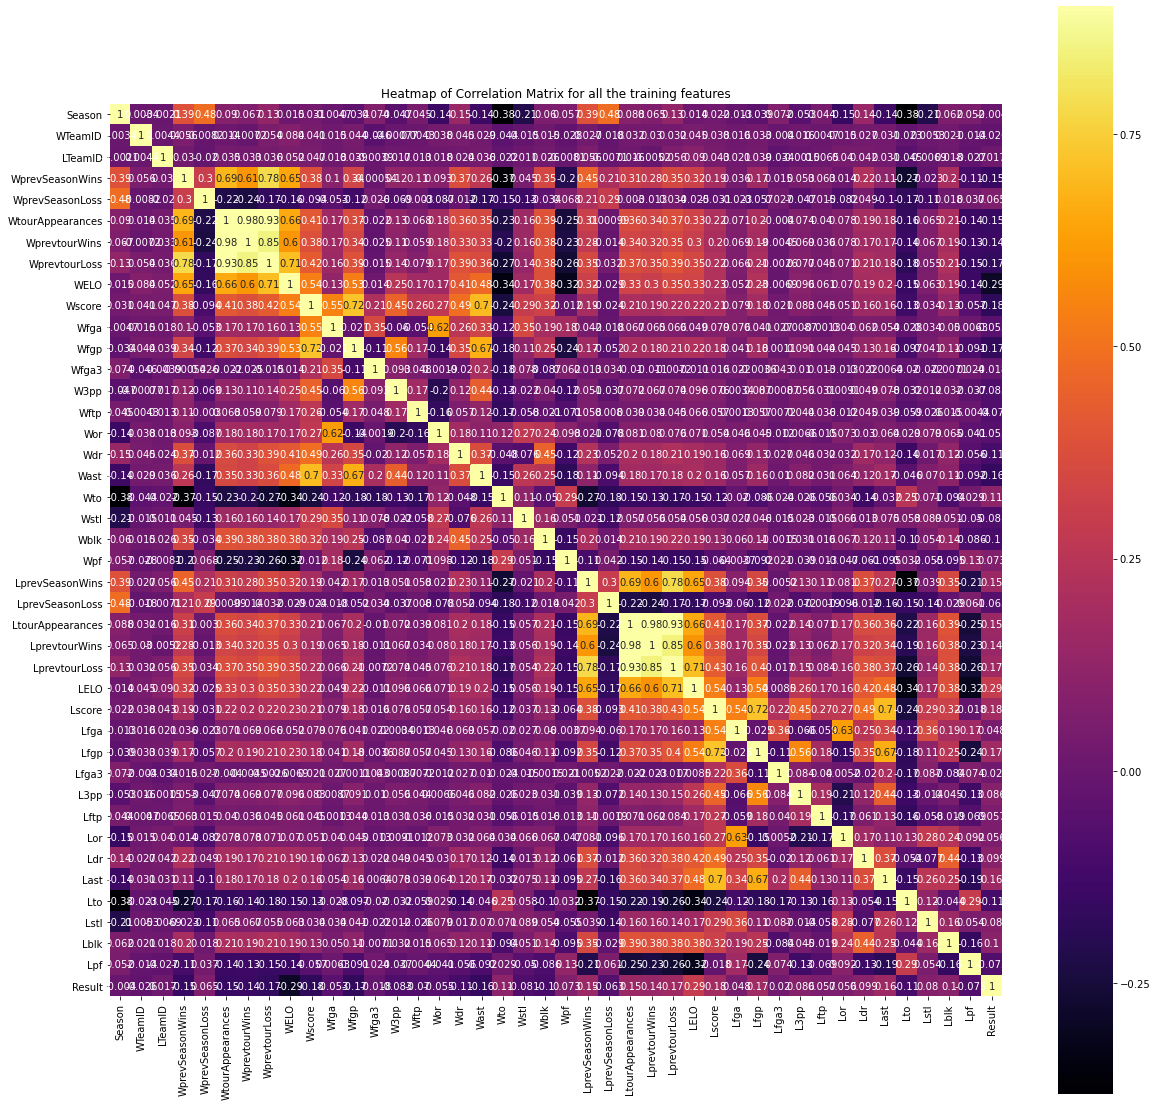

Wall time: 6.2 s


In [31]:
%%time
plt.subplots(figsize=(20,20))
sns.heatmap(trainDf.corr(), cmap='inferno', vmax=0.9, annot=True, square=True)
plt.title('Heatmap of Correlation Matrix for all the training features')
plt.show()

##### <--- Using Logistic Regression --->

Working for prediction season :  2017
Fitting on 55376 samples.
Features of 38  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.728691002379149


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training model complete..
Applying model on Test set of :  13844  Samples
Predicting for Test set complete..
--> Accuracy: 0.7254406240970818
--> Precision: 0.7282498184458969
--> Recall: 0.7220622119815668
Plotting Confusion Matrix.


1

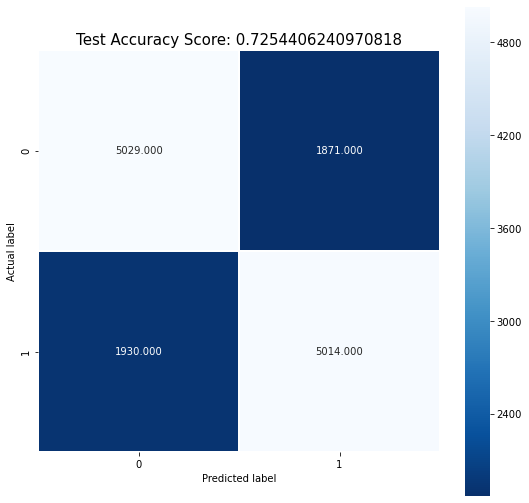

In [32]:
train2017 = df2017.drop(['Season','WTeamID','LTeamID'], axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(train2017,tResult2017,test_size=0.20, random_state=0)

print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, xTrain.to_numpy(), yTrain)
#showFeatureImportance(model,Features)
print('Training model complete..')
print('Applying model on Test set of : ',len(yTest),' Samples')
predictions = model.predict(xTest)
print('Predicting for Test set complete..')
acc_score = model.score(xTest, yTest)
print("--> Accuracy:",metrics.accuracy_score(yTest, predictions))
print("--> Precision:",metrics.precision_score(yTest, predictions))
print("--> Recall:",metrics.recall_score(yTest, predictions))
print('Plotting Confusion Matrix.')
plotConfusionMatrix(yTest, predictions, acc_score)
#createTestSubmissions('lr02',model,predictionYear, True)

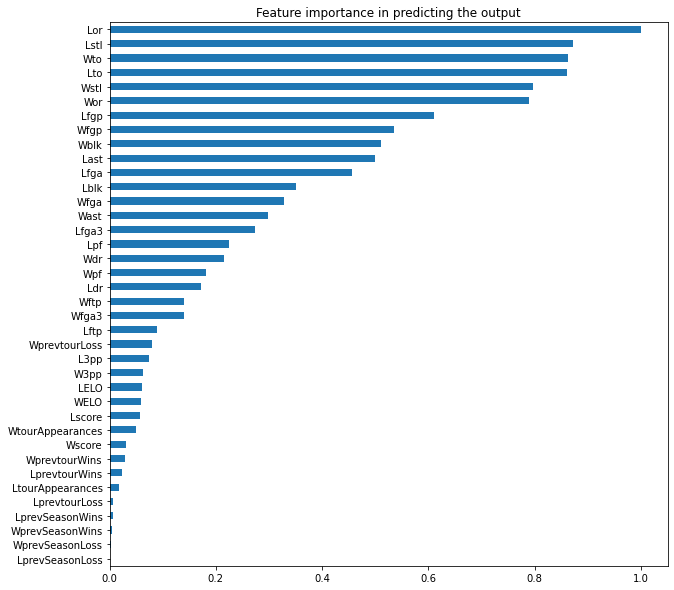

1

In [33]:
showFeatureImportance(model, Features)

In [34]:
%%time
print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, train2017.to_numpy(), tResult2017)
createTestSubmissions('lr02',model,predictionYear, True)

Working for prediction season :  2017
Fitting on 69220 samples.
Features of 38  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.7283299624386016


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Setting Machine Learning Model..
Getting teams..
Predicting using ...
Prediction complete and data saved in directory.
Wall time: 2min 30s


1

##### <--- Using Random Forest --->

Working for prediction season :  2017
Fitting on 55376 samples.
Features of 38  for all samples.
--> Using Random Forest..
Training model complete..
Applying model on Test set of :  13844  Samples
Predicting for Test set complete..
--> Accuracy: 0.7203842819994222
--> Precision: 0.7230367252141094
--> Recall: 0.7173099078341014
Plotting Confusion Matrix.
Wall time: 44.8 s


1

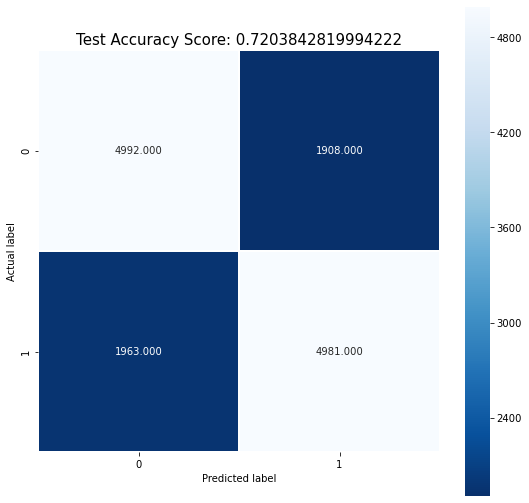

In [35]:
%%time
#--- random forest
print('Working for prediction season : ',str(predictionYear))
model = trainData('rf', predictionYear, xTrain.to_numpy(), yTrain)
#showFeatureImportance(model,Features)
print('Training model complete..')
print('Applying model on Test set of : ',len(yTest),' Samples')
predictions = model.predict(xTest)
print('Predicting for Test set complete..')
acc_score = metrics.accuracy_score(yTest, predictions)
print("--> Accuracy:",acc_score)
print("--> Precision:",metrics.precision_score(yTest, predictions))
print("--> Recall:",metrics.recall_score(yTest, predictions))
print('Plotting Confusion Matrix.')
plotConfusionMatrix(yTest, predictions, acc_score)

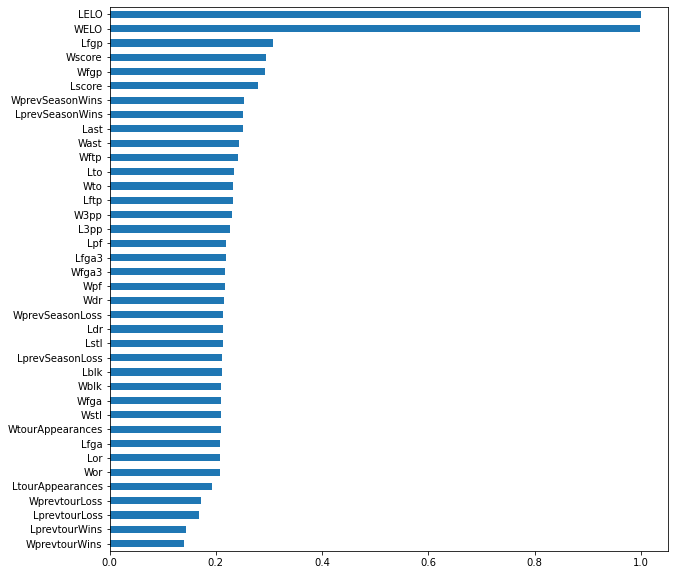

1

In [36]:
showFeatureImportanceEnsembles(model, Features)

In [37]:
%%time
print('Working for prediction season : ',str(predictionYear))
model = trainData('rf', predictionYear, train2017.to_numpy(), tResult2017)
print()
createTestSubmissions('rf02',model,predictionYear, True)

Working for prediction season :  2017
Fitting on 69220 samples.
Features of 38  for all samples.
--> Using Random Forest..

Setting Machine Learning Model..
Getting teams..
Predicting using ...
Prediction complete and data saved in directory.
Wall time: 3min 41s


1

#### Predicting 2019 Winners

##### <--- Using Logistic Regression --->

Working for prediction season :  2019
Fitting on 63788 samples.
Features of 38  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.7261710518172404


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training model complete..
Applying model on Test set of :  15947  Samples
Predicting for Test set complete..
--> Accuracy: 0.7307330532388537
--> Precision: 0.7396030843129819
--> Recall: 0.7236858379715523
Plotting Confusion Matrix.
Wall time: 12.4 s


1

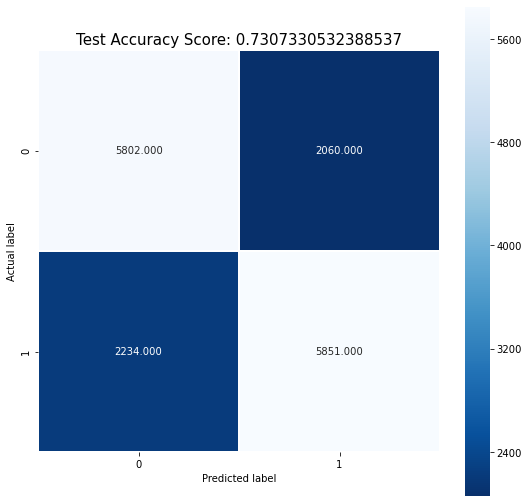

In [38]:
%%time
x2019 = np.load(ProcessedDataDir + 'xTrain2019V2.npy')
tResult2019 = np.load(ProcessedDataDir + 'yTrain2019V2.npy')
predictionYear = 2019
team_elos[predictionYear] = {}
df2019 = pd.DataFrame(data=x2019)
df2019.columns = ['WTeamID','Season','WELO','WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 'WprevtourLoss',
                    'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk',
                    'Wpf','LTeamID','LSeason','LELO','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins', 'LprevtourLoss',
                    'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk',
                    'Lpf']
df2019 = df2019.drop(['LSeason'], axis=1)
df2019 = df2019[['Season', 'WTeamID', 'LTeamID','WprevSeasonWins', 'WprevSeasonLoss', 'WtourAppearances', 'WprevtourWins', 
                 'WprevtourLoss', 'WELO', 'Wscore', 'Wfga', 'Wfgp', 'Wfga3', 'W3pp', 'Wftp', 'Wor', 'Wdr', 'Wast', 'Wto',
                 'Wstl', 'Wblk', 'Wpf','LprevSeasonWins', 'LprevSeasonLoss', 'LtourAppearances', 'LprevtourWins',
                 'LprevtourLoss', 'LELO', 'Lscore','Lfga', 'Lfgp', 'Lfga3', 'L3pp', 'Lftp', 'Lor', 'Ldr', 'Last', 'Lto',
                 'Lstl', 'Lblk', 'Lpf']]

train2019 = df2019.drop(['Season','WTeamID','LTeamID'], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(train2019,tResult2019,test_size=0.20, random_state=0)
print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, xTrain.to_numpy(), yTrain)
#showFeatureImportance(model,Features)
print('Training model complete..')
print('Applying model on Test set of : ',len(yTest),' Samples')
predictions = model.predict(xTest)
print('Predicting for Test set complete..')
acc_score = model.score(xTest, yTest)
print("--> Accuracy:",metrics.accuracy_score(yTest, predictions))
print("--> Precision:",metrics.precision_score(yTest, predictions))
print("--> Recall:",metrics.recall_score(yTest, predictions))
print('Plotting Confusion Matrix.')
plotConfusionMatrix(yTest, predictions, acc_score)
#createTestSubmissions('lr02',model,predictionYear, True)

In [39]:
%%Time
print('Working for prediction season : ',str(predictionYear))
model = trainData('lr', predictionYear, train2019.to_numpy(), tResult2019)
createTestSubmissions('lr02',model,predictionYear, True)

Working for prediction season :  2019
Fitting on 79735 samples.
Features of 38  for all samples.
--> Using Logistic Regression..
Doing 10 fold cross-validation.
Cross Validation Score :  0.7271085151874767


C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Setting Machine Learning Model..
Getting teams..
Predicting using ...
Prediction complete and data saved in directory.


1

##### <--- Using Random Forest --->

Working for prediction season :  2019
Fitting on 63788 samples.
Features of 38  for all samples.
--> Using Random Forest..
Training model complete..
Applying model on Test set of :  15947  Samples
Predicting for Test set complete..
--> Accuracy: 0.7223302188499404
--> Precision: 0.7326631887008526
--> Recall: 0.7121830550401979
Plotting Confusion Matrix.
Wall time: 51.2 s


1

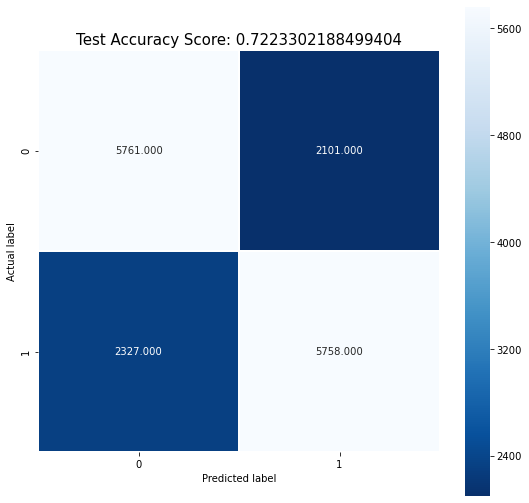

In [40]:
%%time
#--- random forest
print('Working for prediction season : ',str(predictionYear))
model = trainData('rf', predictionYear, xTrain.to_numpy(), yTrain)
#showFeatureImportance(model,Features)
print('Training model complete..')
print('Applying model on Test set of : ',len(yTest),' Samples')
predictions = model.predict(xTest)
print('Predicting for Test set complete..')
acc_score = metrics.accuracy_score(yTest, predictions)
print("--> Accuracy:",acc_score)
print("--> Precision:",metrics.precision_score(yTest, predictions))
print("--> Recall:",metrics.recall_score(yTest, predictions))
print('Plotting Confusion Matrix.')
plotConfusionMatrix(yTest, predictions, acc_score)

In [41]:
%%time
#--- https://www.tablesgenerator.com/markdown_tables#
print('Working for prediction season : ',str(predictionYear))
model = trainData('rf', predictionYear, train2019.to_numpy(), tResult2019)
createTestSubmissions('rf02',model,predictionYear, True)

Working for prediction season :  2019
Fitting on 79735 samples.
Features of 38  for all samples.
--> Using Random Forest..
Setting Machine Learning Model..
Getting teams..
Predicting using ...
Prediction complete and data saved in directory.
Wall time: 3min 57s


1

### Results and Discussion

As we have successfully predicted potential winners for NCAA basketball tournament for the year 2017 and 2019, we have compared our results with the kaggle masters using the score it provides after we submit the csv files. Below table shows the results along with the previous scores and what our rank would be if we submitted the same model result at that time.

***For Year 2017***

| Model | Using Future Data   | Include ELO | Logloss score(Kaggle) | Kaggle Top score | Predicted Kaggle Position | Predicted Kaggle Percentage |
|---------------------|---------------------|-------------|-----------------------|------------------|---------------------------|-----------------------------|
| Logistic Regression | No | No | 0.50753 | 0.43857 | 163/441 |  |
| Random Forest | No | No | 0.54011 | 0.43857 | 280/441 |  |
| Logistic Regression | No | Yes | 0.43510 | 0.43857 | 1/441 |  |
| Random Forest | No | Yes | 0.48540 | 0.43857 | 62/441 |  |
| Logistic Regression | Yes | No | 0.50729 | 0.43857 | 160/441 |  |
| Random Forest | Yes | No | 0.44093 | 0.43857 | 3/441 |  |


***For Year 2019***


| Model | Using Future Data   | Include ELO | Logloss score(Kaggle) | Kaggle Top score | Predicted Kaggle Position | Predicted Kaggle Percentage |
|---------------------|---------------------|-------------|-----------------------|------------------|---------------------------|-----------------------------|
| Logistic Regression | No | No | 0.67801 | 0.41477 | 712/866 |  |
| Random Forest | No | No | 0.67915 | 0.41477 | 714/866 |  |
| Logistic Regression | No | Yes | 0.46028 | 0.41477 | 88/866 |  |
| Random Forest | No | Yes | 0.54153 | 0.41477 | 591/866 |  |
| Logistic Regression | Yes | No | 0.63143 | 0.41477 | 702/866 |  |
| Random Forest | Yes | No | 0.44815 | 0.41477 | 31/866 |  |


### Conclusion

We have learned about Basketball whose strategies are unknown to us before, We have used the stratergies taught to us in class to select features, using feature engineering techniques such as finding corelation between the features and dependent variable. As we have described the problem as a classification problem, we determined the probability of classifying a given team as a loser or a winner. we also got to see how adding features can improve the accuracy of the prediction.


***Kaggle for 2017***
![Original Bracket 2019](./stage1/kaggle2017_a.png)


***2017 Leaderboard***
![Original Bracket 2019](./stage1/kaggle2017_leader.png)

***Kaggle for 2019***
![Original Bracket 2019](./stage1/kaggle2017_a.png)


***2019 Leaderboard***
![Original Bracket 2019](./stage1/kaggle2019_leader.png)

### Creating Brackets

#### For 2017

In [42]:
# from bracketeer import build_bracket
# b = build_bracket(
#         outputPath='./stage1/output2017.png', 
#         teamsPath=datadir + '/Data2017/Teams.csv',
#         seedsPath=datadir + '/Data2017/TourneySeeds.csv',
#         submissionPath='./stage1/submission-2017_lr02.csv',
#         slotsPath=datadir + '/Data2017/TourneySlots.csv',
#         year=2017
# )

***Predicted Bracket 2017***

![Predicted Bracket 2017](./stage1/output2017.png)

***Original Bracket 2017***

[Original Bracket 2017](https://www.allbrackets.com/bracket.php?year=2017)

![Original Bracket 2017](./stage1/2017True.png)

***Errors in the Bracket***
![Original Bracket 2017](./stage1/output2017_Upsets.png)

#### For 2019

In [43]:
# b = build_bracket(
#         outputPath='./stage1/output2019.png', 
#         teamsPath=datadir + '/Data2019/Teams.csv',
#         seedsPath=datadir + '/Data2019/NCAATourneySeeds.csv',
#         submissionPath='./stage1/submission-2019_lr02.csv',
#         slotsPath=datadir + '/Data2019/NCAATourneySlots.csv',
#         year=2019
# )

***Predicted Bracket 2019***

![Predicted Bracket 2019](./stage1/output2019.png)

***Original Bracket 2019***

#[Original Bracket 2019](https://www.allbrackets.com/bracket.php?year=2019)

![Original 2019 Bracket](https://www.ncaa.com/sites/default/files/public/styles/original/public-s3/images/2019/04/09/ncaa-tournament-bracket-2019-scores-games-virginia-texas-tech.png?itok=0E3VNWmI)

***Errors in the Bracket***
![Original Bracket 2019](./stage1/output2019_Upsets.png)

In [44]:
#--- dependencies for baracketerr
# binary Tree install using command -  conda install -c conda-forge binarytree
# pip install bracketeer
# https://github.com/cshaley/bracketeer

#Understanding ELO, https://www.youtube.com/watch?v=AsYfbmp0To0
#https://www.kaggle.com/wacaxx/understanding-elo